In [2]:
# Digital Signal Processing – Capítulo 5: Transformada Discreta de Fourier

# Seção 5.1 – Introdução à DFT
## Texto explicativo
"""
A Transformada Discreta de Fourier (DFT) converte uma sequência finita de amostras no domínio do tempo para o domínio da frequência. A DFT é definida por:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi kn/N}
$$

Ela é computada por:
"""

import numpy as np
x = np.array([1, 2, 3, 4])
X = np.fft.fft(x)
x_reconstructed = np.fft.ifft(X)
print("DFT:", X)
print("IDFT:", x_reconstructed)

DFT: [10.+0.j -2.+2.j -2.+0.j -2.-2.j]
IDFT: [1.+0.j 2.+0.j 3.+0.j 4.+0.j]


In [3]:
# Seção 5.2 – Propriedades da DFT
"""
Propriedade de Linearidade:
Se $z[n] = a x[n] + b y[n]$, então $Z[k] = a X[k] + b Y[k]$.
"""

x = np.array([1, 2, 3, 4])
y = np.array([4, 3, 2, 1])
a, b = 2, 3
z = a * x + b * y
Z1 = np.fft.fft(z)
Z2 = a * np.fft.fft(x) + b * np.fft.fft(y)
print("Linearidade válida?", np.allclose(Z1, Z2))

Linearidade válida? True


In [4]:
# Seção 5.3 – DFT Manual
"""
DFT manual para N=4
"""

N = 4
X_manual = []
for k in range(N):
    s = 0
    for n in range(N):
        s += x[n] * np.exp(-2j * np.pi * k * n / N)
    X_manual.append(s)
print("DFT manual:", X_manual)


DFT manual: [np.complex128(10+0j), np.complex128(-2.0000000000000004+1.9999999999999996j), np.complex128(-2-9.797174393178826e-16j), np.complex128(-1.9999999999999982-2.000000000000001j)]


In [5]:
# Seção 5.4 – Propriedades adicionais
"""
Deslocamento circular e conjugação:
"""

x_shifted = np.roll(x, 1)
X = np.fft.fft(x)
X_shifted = np.fft.fft(x_shifted)
print("Fase do original:", np.angle(X))
print("Fase do deslocado:", np.angle(X_shifted))


Fase do original: [ 0.          2.35619449  3.14159265 -2.35619449]
Fase do deslocado: [ 0.          0.78539816  0.         -0.78539816]


In [6]:
# Seção 5.5 – Convolução Linear via DFT
"""
Convolução linear via DFT:
"""

from scipy.signal import convolve
h = np.array([0.2, 0.5, 0.2])
L = len(x) + len(h) - 1
X_pad = np.fft.fft(x, L)
H_pad = np.fft.fft(h, L)
y_fft = np.fft.ifft(X_pad * H_pad).real
y_conv = np.convolve(x, h)
print("Convolução (np.convolve):", y_conv[:5])
print("Convolução (FFT):", y_fft[:5])


Convolução (np.convolve): [0.2 0.9 1.8 2.7 2.6]
Convolução (FFT): [0.2 0.9 1.8 2.7 2.6]


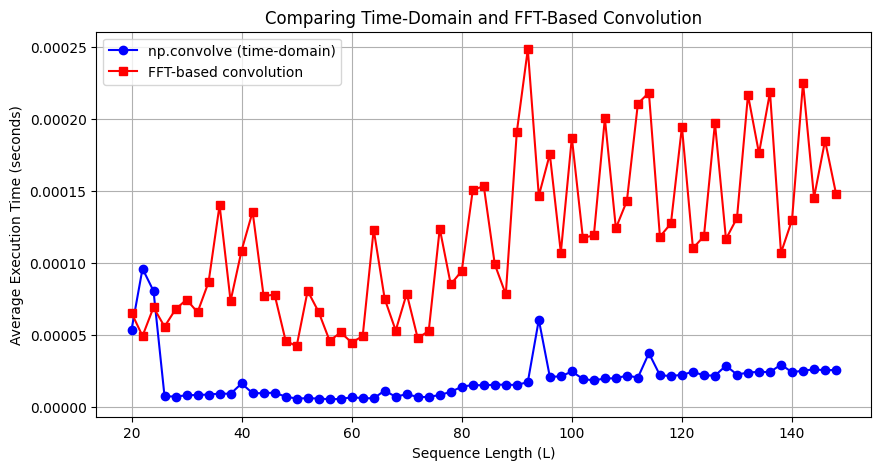

In [7]:
# Seção 5.6 – FFT e Desempenho
"""
Comparação de tempo entre convolução direta e via FFT
"""

import matplotlib.pyplot as plt
import time

time_direct = []
time_fft = []
L_values = np.arange(20, 150, 2)

for L in L_values:
    x = np.random.rand(L)
    h = np.random.rand(L)

    start = time.time()
    for _ in range(5):
        y1 = np.convolve(x, h)
    time_direct.append((time.time() - start)/5)

    start = time.time()
    for _ in range(5):
        X = np.fft.fft(x, 2*L-1)
        H = np.fft.fft(h, 2*L-1)
        y2 = np.fft.ifft(X * H).real
    time_fft.append((time.time() - start)/5)

plt.figure(figsize=(10,5))
plt.plot(L_values, time_direct, 'bo-', label='np.convolve (time-domain)')
plt.plot(L_values, time_fft, 'rs-', label='FFT-based convolution')
plt.xlabel("Sequence Length (L)")
plt.ylabel("Average Execution Time (seconds)")
plt.title("Comparing Time-Domain and FFT-Based Convolution")
plt.legend()
plt.grid(True)
plt.show()
